Step 1: Run in the terminal "pip install kaggle"  
Step 2: Activate kaggle API token in Account tab  
Step 3: Get kaggle.json file -> save to C:/Users/jtrum/.kaggle  
Step 4: Run in the terminal "kaggle datasets download -d kmader/satellite-images-of-hurricane-damage  
Step 5: Run code chunk below -> specify pathway where it says ("~/datasets/")  

In [8]:
import os
import zipfile

with zipfile.ZipFile("satellite-images-of-hurricane-damage.zip", "r") as zip_ref:
    zip_ref.extractall(os.path.expanduser("C:/Users/jtrum/pennmusa/MUSA6500/finalData"))

In [5]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import keras as keras
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Dropout, UpSampling2D, Concatenate
from tensorflow.keras.models import Model

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold


Training data (5000 of each class)

In [35]:
#Since the channels are 3, we can use keras to import into a dataset.
train_path = 'C:/Users/jtrum/pennmusa/MUSA6500/finalData/train_another'

#Use Keras to import data
train_dataset = keras.utils.image_dataset_from_directory(
    train_path,
    labels="inferred",
    label_mode="int",
    class_names= ['no_damage', 'damage'],
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

#Convert keras dataset to numpy array
train_dataset = train_dataset.unbatch()
train_X = np.asarray(list(train_dataset.map(lambda x, y: x)))
train_y = np.asarray(list(train_dataset.map(lambda x, y: y)))

Found 10000 files belonging to 2 classes.


Validation data (1000 of each class)

In [36]:
#Since the channels are 3, we can use keras to import into a dataset.
val_path = 'C:/Users/jtrum/pennmusa/MUSA6500/finalData/validation_another'

#Use Keras to import data
val_dataset = keras.utils.image_dataset_from_directory(
    val_path,
    labels="inferred",
    label_mode="int",
    class_names= ['no_damage', 'damage'],
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

#Convert keras dataset to numpy array
val_dataset = val_dataset.unbatch()
val_X = np.asarray(list(val_dataset.map(lambda x, y: x)))
val_y = np.asarray(list(val_dataset.map(lambda x, y: y)))

Found 2000 files belonging to 2 classes.


Test dataset (1000 of each class)

In [37]:
#Since the channels are 3, we can use keras to import into a dataset.
test_path = 'C:/Users/jtrum/pennmusa/MUSA6500/finalData/test'

#Use Keras to import data
test_dataset = keras.utils.image_dataset_from_directory(
    test_path,
    labels="inferred",
    label_mode="int",
    class_names= ['no_damage', 'damage'],
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

#Convert keras dataset to numpy array
test_dataset = test_dataset.unbatch()
test_X = np.asarray(list(test_dataset.map(lambda x, y: x)))
test_y = np.asarray(list(test_dataset.map(lambda x, y: y)))

Found 2000 files belonging to 2 classes.


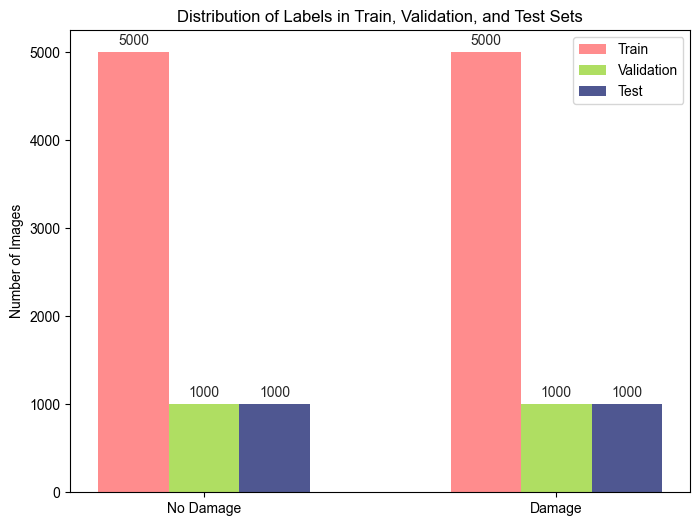

In [13]:
import matplotlib.pyplot as plt

# Define the labels
labels = ['No Damage', 'Damage']

# Count the number of labels in each array
train_counts = [sum(train_y==0), sum(train_y==1)]
val_counts = [sum(val_y==0), sum(val_y==1)]
test_counts = [sum(test_y==0), sum(test_y==1)]

# Create a barplot
fig, ax = plt.subplots(figsize=(8,6))
x = np.arange(len(labels))  # the label locations
width = 0.2  # the width of the bars

rects1 = ax.bar(x - width, train_counts, width, label='Train', color='#FF8C8DFF')
rects2 = ax.bar(x, val_counts, width, label='Validation', color='#AFDE62FF')
rects3 = ax.bar(x + width, test_counts, width, label='Test', color='#4F5791FF')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Number of Images')
ax.set_title('Distribution of Labels in Train, Validation, and Test Sets')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
sns.set_style("ticks")

# Add counts above the bars
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

plt.show()


Resnet

In [56]:
img_width = 128
img_height = 128
num_channels = 3
num_classes = 2
input_shape = 128, 128, 3

In [55]:
# Shapes of each label
from keras.utils import to_categorical
tr_y = to_categorical(train_y, num_classes=2)
v_y = to_categorical(val_y, num_classes=2)
te_y = to_categorical(test_y, num_classes=2)
print("Shape of train images is: ", train_X.shape)
print("Shape of validation images is: ", val_X.shape)
print("Shape of test images is: ", test_X.shape)
print("Shape of train labels is: ", tr_y.shape)
print("Shape of validation labels is: ", v_y.shape)
print("Shape of test labels is: ", te_y.shape)

Shape of train images is:  (10000, 128, 128, 3)
Shape of validation images is:  (2000, 128, 128, 3)
Shape of test images is:  (2000, 128, 128, 3)
Shape of train labels is:  (10000, 2)
Shape of validation labels is:  (2000, 2)
Shape of test labels is:  (2000, 2)


In [ ]:
train_data = train_data.reshape((train_data.shape[0], -1))
val_data = val_data.reshape((val_data.shape[0], -1))
test_data = test_data.reshape((test_data.shape[0], -1))

In [57]:
def ResNet(input_shape, num_classes):
    # Input layer
    inputs = Input(shape=input_shape)
    
    # Convolutional block 1
    x = Conv2D(filters=32, kernel_size=(3,3), strides=(1,1), padding='same')(inputs)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same')(x)

    # Residual block 1
    residual = x
    
    x = Conv2D(filters=32, kernel_size=(3,3), strides=(1,1), padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    
    x = Conv2D(filters=32, kernel_size=(3,3), strides=(1,1), padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    
    x = Add()([x, residual])
    x = Activation('relu')(x)

    # Residual block 2
    residual = x
    
    x = Conv2D(filters=64, kernel_size=(3,3), strides=(2,2), padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    
    x = Conv2D(filters=64, kernel_size=(3,3), strides=(1,1), padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    
    # downsampling
    residual = Conv2D(filters=64, kernel_size=(1,1), strides=(2,2), padding='same')(residual)
    x = Add()([x, residual])
    x = Activation('relu')(x)
    
    # Residual block 3
    residual = x
    
    x = Conv2D(filters=128, kernel_size=(3,3), strides=(2,2), padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    
    x = Conv2D(filters=128, kernel_size=(3,3), strides=(1,1), padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    
    # downsampling
    residual = Conv2D(filters=128, kernel_size=(1,1), strides=(2,2), padding='same')(residual)
    x = Add()([x, residual])
    x = Activation('relu')(x)

    # Residual block 4
    residual = x
    
    x = Conv2D(filters=256, kernel_size=(3,3), strides=(2,2), padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    
    x = Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    
    # downsampling
    residual = Conv2D(filters=256, kernel_size=(1,1), strides=(2,2), padding='same')(residual)
    x = Add()([x, residual])
    x = Activation('relu')(x)

    # Residual block 5
    residual = x
    
    x = Conv2D(filters=512, kernel_size=(3,3), strides=(2,2), padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    
    x = Conv2D(filters=512, kernel_size=(3,3), strides=(1,1), padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    
    x = Add()([x, residual])
    x = Activation('relu')(x)
    
    # Output layers
    x = Flatten()(x)
    x = Dense(units=num_classes, activation='softmax')(x)
    
    # Create model
    model = Model(inputs=inputs, outputs=x)
    
    return model


In [60]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, BatchNormalization, ReLU, Add, Flatten, Dense
from tensorflow.keras.models import Model

def resnet_block(input_data, filters, strides=1):
    x = Conv2D(filters, kernel_size=3, strides=strides, padding="same")(input_data)
    x = BatchNormalization()(x)
    x = ReLU()(x)
    x = Conv2D(filters, kernel_size=3, strides=1, padding="same")(x)
    x = BatchNormalization()(x)

    shortcut = input_data
    if strides > 1:
        shortcut = Conv2D(filters, kernel_size=1, strides=strides, padding="same")(shortcut)
        shortcut = BatchNormalization()(shortcut)

    x = Add()([x, shortcut])
    x = ReLU()(x)
    return x

def build_resnet(input_shape, num_classes):
    inputs = Input(shape=input_shape)
    x = Conv2D(64, kernel_size=7, strides=2, padding="same")(inputs)
    x = BatchNormalization()(x)
    x = ReLU()(x)
    x = MaxPooling2D(pool_size=3, strides=2, padding="same")(x)

    x = resnet_block(x, 64)
    x = resnet_block(x, 64)
    x = resnet_block(x, 64)

    x = resnet_block(x, 128, strides=2)
    x = resnet_block(x, 128)
    x = resnet_block(x, 128)

    x = resnet_block(x, 256, strides=2)
    x = resnet_block(x, 256)
    x = resnet_block(x, 256)

    x = resnet_block(x, 512, strides=2)
    x = resnet_block(x, 512)
    x = resnet_block(x, 512)

    x = Flatten()(x)
    outputs = Dense(num_classes, activation="softmax")(x)

    model = Model(inputs, outputs)
    return model

model = build_resnet(input_shape=(128, 128, 3), num_classes=num_classes)

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.fit(train_X, tr_y, batch_size=32, epochs=10, validation_data=(val_X, v_y))

In [61]:
model = build_resnet(input_shape=(128, 128, 3), num_classes=num_classes)


In [62]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.fit(train_X, tr_y, batch_size=32, epochs=10, validation_data=(val_X, v_y))


Epoch 1/10
313/313 [==============================] - 1109s 4s/step - loss: 1.2542 - accuracy: 0.6620 - val_loss: 1.7465 - val_accuracy: 0.5000
Epoch 2/10
313/313 [==============================] - 1095s 4s/step - loss: 0.4780 - accuracy: 0.8679 - val_loss: 0.6450 - val_accuracy: 0.6980
Epoch 3/10
313/313 [==============================] - 1090s 3s/step - loss: 0.4280 - accuracy: 0.8717 - val_loss: 6.6169 - val_accuracy: 0.5395
Epoch 4/10
313/313 [==============================] - 1104s 4s/step - loss: 0.2313 - accuracy: 0.9140 - val_loss: 0.4213 - val_accuracy: 0.8070
Epoch 5/10
313/313 [==============================] - 1082s 3s/step - loss: 0.2126 - accuracy: 0.9224 - val_loss: 3.2847 - val_accuracy: 0.5315
Epoch 6/10
313/313 [==============================] - 1128s 4s/step - loss: 0.1800 - accuracy: 0.9310 - val_loss: 2.7980 - val_accuracy: 0.5000
Epoch 7/10
313/313 [==============================] - 1041s 3s/step - loss: 0.3510 - accuracy: 0.8949 - val_loss: 1.3041 - val_accuracy:

In [63]:
# Apply to test data
loss, accuracy = model.evaluate(test_X, te_y)
# Print loss and accuracy scores rounded to 2 decimal places
print("Test Loss:", round(loss,2))
print("Test Accuracy:", round(accuracy,2))

63/63 [==============================] - 24s 380ms/step - loss: 5.7690 - accuracy: 0.5805
Test Loss: 5.77
Test Accuracy: 0.58


In [95]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, BatchNormalization, ReLU, Add, Flatten, Dense
from tensorflow.keras.models import Model

def resnet_block(input_data, filters, strides=1):
    x = Conv2D(filters, kernel_size=3, strides=strides, padding="same")(input_data)
    x = BatchNormalization()(x)
    x = ReLU()(x)
    x = Conv2D(filters, kernel_size=3, strides=1, padding="same")(x)
    x = BatchNormalization()(x)

    shortcut = input_data
    if strides > 1:
        shortcut = Conv2D(filters, kernel_size=1, strides=strides, padding="same")(shortcut)
        shortcut = BatchNormalization()(shortcut)

    x = Add()([x, shortcut])
    x = ReLU()(x)
    return x

def build_resnet(input_shape, num_classes):
    inputs = Input(shape=input_shape)
    x = Conv2D(64, kernel_size=7, strides=2, padding="same")(inputs)
    x = BatchNormalization()(x)
    x = ReLU()(x)
    x = MaxPooling2D(pool_size=3, strides=2, padding="same")(x)

    x = resnet_block(x, 64)
    x = resnet_block(x, 64)
    x = resnet_block(x, 64)

    x = resnet_block(x, 128, strides=2)
    x = resnet_block(x, 128)
    x = resnet_block(x, 128)

    x = resnet_block(x, 256, strides=2)
    x = resnet_block(x, 256)
    x = resnet_block(x, 256)

    x = resnet_block(x, 512, strides=2)
    x = resnet_block(x, 512)
    x = resnet_block(x, 512)

    x = Flatten()(x)
    outputs = Dense(num_classes, activation="softmax")(x)

    model = Model(inputs, outputs)
    return model

model = build_resnet(input_shape=(128, 128, 3), num_classes=num_classes)

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
history = model.fit(train_X, tr_y, batch_size=32, epochs=10, validation_data=(val_X, v_y))

Epoch 1/10
 16/313 [>.............................] - ETA: 20:15 - loss: 3.9338 - accuracy: 0.5586

KeyboardInterrupt: 

In [87]:
def resnet_block(input_data, filters, strides=1):
    x = Conv2D(filters, kernel_size=3, strides=strides, padding="same", kernel_regularizer=l2_reg)(input_data)
    x = BatchNormalization()(x)
    x = ReLU()(x)
    x = Conv2D(filters, kernel_size=3, strides=1, padding="same", kernel_regularizer=l2_reg)(x)
    x = BatchNormalization()(x)

    shortcut = input_data
    if strides > 1:
        shortcut = Conv2D(filters, kernel_size=1, strides=strides, padding="same")(shortcut)
        shortcut = BatchNormalization()(shortcut)

    x = Add()([x, shortcut])
    x = ReLU()(x)
    return x

def build_resnet(input_shape, num_classes):
    inputs = Input(shape=input_shape)
    x = Conv2D(32, kernel_size=3, strides=1, padding="same", kernel_regularizer=l2_reg)(inputs)
    x = BatchNormalization()(x)
    x = ReLU()(x)

    x = resnet_block(x, 64, strides=2)
    for _ in range(2):
        x = resnet_block(x, 64)

    x = resnet_block(x, 128, strides=2)
    for _ in range(2):
        x = resnet_block(x, 128)

    x = resnet_block(x, 256, strides=2)
    for _ in range(2):
        x = resnet_block(x, 256)

    x = resnet_block(x, 512, strides=2)
    for _ in range(2):
        x = resnet_block(x, 512)

    x = AveragePooling2D(pool_size=4)(x)
    x = Flatten()(x)
    outputs = Dense(num_classes, activation="softmax", kernel_regularizer=l2_reg)(x)

    model = Model(inputs, outputs)
    return model

# Compile model
model = build_resnet(input_shape=(128, 128, 3), num_classes=num_classes)
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Fit model with data augmentation and generator
train_generator = train_datagen.flow(train_X, tr_y, batch_size=64)
val_generator = val_datagen.flow(val_X, v_y)



Epoch 1/8


KeyboardInterrupt: 

In [90]:
from keras.utils import plot_model

In [94]:
import tensorflow as tf
model = tf.keras.applications.ResNet18(input_shape=(128, 128, 3), weights=None, classes=2)


import torch
import torchvision.models as models
model = models.resnet18(pretrained=False)


AttributeError: module 'keras.api._v2.keras.applications' has no attribute 'ResNet18'

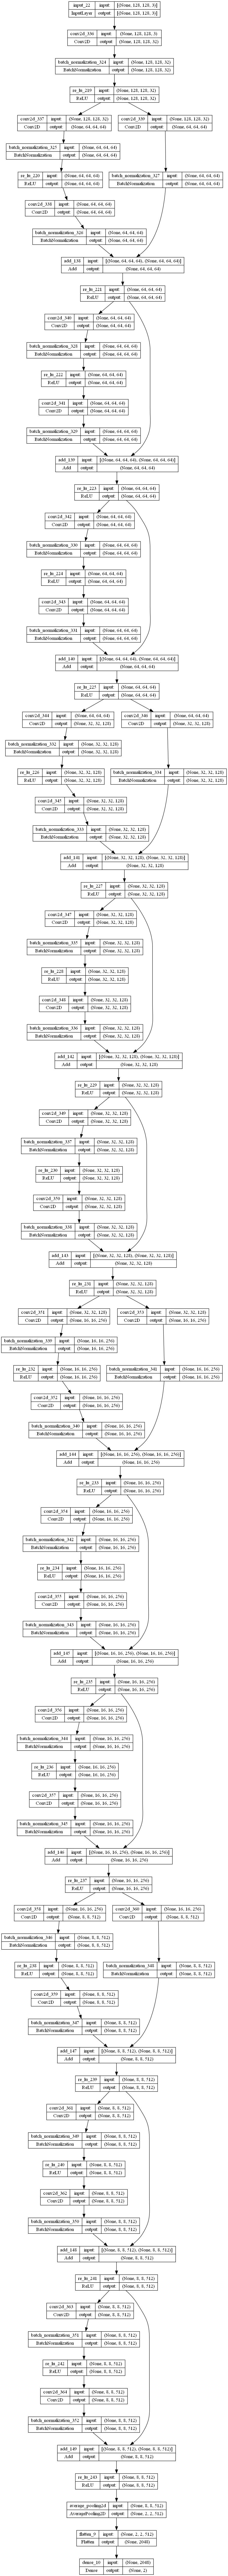

In [92]:
plot_model(model,
    show_shapes=True,
    show_layer_names=True
)

In [84]:

# Define data augmentation
train_datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    vertical_flip=False,
    fill_mode='nearest')

val_datagen = ImageDataGenerator()

# Define regularization
l2_reg = l2(0.0001)

def resnet_block(input_data, filters, strides=1):
    x = Conv2D(filters, kernel_size=3, strides=strides, padding="same", kernel_regularizer=l2_reg)(input_data)
    x = BatchNormalization()(x)
    x = ReLU()(x)
    x = Conv2D(filters, kernel_size=3, strides=1, padding="same", kernel_regularizer=l2_reg)(x)
    x = BatchNormalization()(x)

    shortcut = input_data
    if strides > 1:
        shortcut = Conv2D(filters, kernel_size=1, strides=strides, padding="same")(shortcut)
        shortcut = BatchNormalization()(shortcut)

    x = Add()([x, shortcut])
    x = ReLU()(x)
    x = Dropout(0.5)(x)  # Add dropout
    return x

def build_resnet(input_shape, num_classes):
    inputs = Input(shape=input_shape)
    x = Conv2D(64, kernel_size=7, strides=2, padding="same", kernel_regularizer=l2_reg)(inputs)
    x = BatchNormalization()(x)
    x = ReLU()(x)
    x = MaxPooling2D(pool_size=3, strides=2, padding="same")(x)

    x = resnet_block(x, 64)
    x = resnet_block(x, 64)
    x = resnet_block(x, 64)

    x = resnet_block(x, 128, strides=2)
    x = resnet_block(x, 128)
    x = resnet_block(x, 128)

    x = resnet_block(x, 256, strides=2)
    x = resnet_block(x, 256)
    x = resnet_block(x, 256)

    x = resnet_block(x, 512, strides=2)
    x = resnet_block(x, 512)
    x = resnet_block(x, 512)

    x = Flatten()(x)
    x = Dropout(0.5)(x)  # Add dropout
    outputs = Dense(num_classes, activation="softmax", kernel_regularizer=l2_reg)(x)

    model = Model(inputs, outputs)
    return model

# Compile model
model = build_resnet(input_shape=(128, 128, 3), num_classes=num_classes)
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Fit model with data augmentation and generator
train_generator = train_datagen.flow(train_X, tr_y, batch_size=64)
val_generator = val_datagen.flow(val_X, v_y)

history = model.fit(train_generator, epochs=8, validation_data=val_generator)

Epoch 1/8


KeyboardInterrupt: 

In [74]:
model.save('model.h5')

from tensorflow.keras.models import load_model

loaded_model = load_model('model.h5')

In [75]:
import matplotlib.pyplot as plt

# Get training and validation accuracy values
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Get training and validation loss values
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot accuracy values
plt.plot(train_acc)
plt.plot(val_acc)
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot loss values
plt.plot(train_loss)
plt.plot(val_loss)
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()


AttributeError: 'function' object has no attribute 'history'

In [70]:
# plot accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# plot loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

AttributeError: 'function' object has no attribute 'history'

In [66]:
# Make a plot of the accuracy and loss for the training and validation data

# Get the training and validation accuracy of each epoch
M1_train_acc = model.history['accuracy']
M1_val_acc = model.history['val_accuracy']
M1_train_loss = model.history['loss']
M1_val_loss = model.history['val_loss']


TypeError: 'History' object is not subscriptable

In [37]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy

# Define the optimizer and loss function
optimizer = Adam(learning_rate=0.001)
loss = SparseCategoricalCrossentropy()

# Compile the model
model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

# Fit the model to the training data
history = model.fit(train_X, train_y, batch_size=32, epochs=10, validation_data=(val_X, val_y))

# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(test_X, test_y)

print('Test Loss:', test_loss)
print('Test Accuracy:', test_acc)


NameError: name 'model' is not defined

In [ ]:
from keras.models import Model
from keras.layers import Input, Conv2D, BatchNormalization, Activation, MaxPooling2D, Add, Flatten, Dense
from keras.regularizers import l2

def ResNet(input_shape, num_classes):
    # Input layer
    inputs = Input(shape=input_shape)
    
    # Convolutional block 1
    x = Conv2D(filters=64, kernel_size=(7,7), strides=(2,2), padding='same')(inputs)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='same')(x)

    # Residual block 1
    residual = x
    
    x = Conv2D(filters=64, kernel_size=(3,3), strides=(1,1), padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    
    x = Conv2D(filters=64, kernel_size=(3,3), strides=(1,1), padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    
    x = Add()([x, residual])
    x = Activation('relu')(x)

    # Residual block 2
    residual = x
    
    x = Conv2D(filters=128, kernel_size=(3,3), strides=(2,2), padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    
    x = Conv2D(filters=128, kernel_size=(3,3), strides=(1,1), padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    
    x = Add()([x, residual])
    x = Activation('relu')(x)
    
    # Residual block 3
    residual = x
    
    x = Conv2D(filters=256, kernel_size=(3,3), strides=(2,2), padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    
    x = Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    
    x = Add()([x, residual])
    x = Activation('relu')(x)

    # Residual block 4
    residual = x
    
    x = Conv2D(filters=512, kernel_size=(1,1), strides=(2,2), padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    
    x = Conv2D(filters=512, kernel_size=(3,3), strides=(1,1), padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    
    x = Add()([x, residual])
    x = Activation('relu')(x)
    
    # Output layers
    x = Flatten()(x)
    x = Dense(units=num_classes, activation='softmax')(x)
    
    # Create model
    model = Model(inputs=inputs, outputs=x)
    
    return model

In [21]:
x_train, x_test, y_train, y_test = train_test_split(train_X, train_y, stratify=train_y, test_size=0.5, random_state=0)

In [23]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(5000, 128, 128, 3)
(5000, 128, 128, 3)
(5000,)
(5000,)


In [14]:
base_model = keras.applications.ResNet50V2(
    weights='imagenet',
    include_top=False,
    input_shape=(img_width, img_height, num_channels)
)

base_model.trainable = False

inputs = keras.Input(shape=(img_width, img_height, num_channels))
x = base_model(inputs, training=False)
x = keras.layers.GlobalAveragePooling2D()(x)
x = keras.layers.Dense(128, activation='relu')(x)
outputs = keras.layers.Dense(1, activation='sigmoid')(x)

model = keras.Model(inputs, outputs)

model.summary()


NameError: name 'IMG_HEIGHT' is not defined

In [41]:
input_shape = (img_width, img_height, num_channels)
num_classes = 2
input_shape

(128, 128, 3)

In [42]:
from keras.models import Model
from keras.layers import Input, Conv2D, BatchNormalization, Activation, MaxPooling2D, Add, Flatten, Dense
from keras.regularizers import l2

def ResNet(input_shape, num_classes):
    # Input layer
    inputs = Input(shape=input_shape)
    
    # Convolutional block 1
    x = Conv2D(filters=64, kernel_size=(7,7), strides=(2,2), padding='same')(inputs)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='same')(x)

    # Residual block 1
    residual = x
    
    x = Conv2D(filters=64, kernel_size=(3,3), strides=(1,1), padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    
    x = Conv2D(filters=64, kernel_size=(3,3), strides=(1,1), padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    
    x = Add()([x, residual])
    x = Activation('relu')(x)

    # Residual block 2
    residual = x
    
    x = Conv2D(filters=128, kernel_size=(3,3), strides=(2,2), padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    
    x = Conv2D(filters=128, kernel_size=(3,3), strides=(1,1), padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    
    x = Add()([x, residual])
    x = Activation('relu')(x)
    
    # Residual block 3
    residual = x
    
    x = Conv2D(filters=256, kernel_size=(3,3), strides=(2,2), padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    
    x = Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    
    x = Add()([x, residual])
    x = Activation('relu')(x)

    # Residual block 4
    residual = x
    
    x = Conv2D(filters=512, kernel_size=(3,3), strides=(2,2), padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    
    x = Conv2D(filters=512, kernel_size=(3,3), strides=(1,1), padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    
    x = Add()([x, residual])
    x = Activation('relu')(x)
    
    # Output layers
    x = Flatten()(x)
    x = Dense(units=num_classes, activation='softmax')(x)
    
    # Create model
    model = Model(inputs=inputs, outputs=x)
    
    return model

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy

# Define the input shape and number of classes
input_shape = (128, 128, 3)
num_classes = 2


In [43]:
# Define the optimizer and loss function
optimizer = Adam(learning_rate=0.001)
loss = SparseCategoricalCrossentropy()

# Compile the model
model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

# Fit the model to the training data
history = model.fit(train_X, train_y, batch_size=32, epochs=10, validation_data=(val_X, val_y))

# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(test_X, test_y)

print('Test Loss:', test_loss)
print('Test Accuracy:', test_acc)


NameError: name 'model' is not defined

In [48]:
import numpy as np
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from skimage.transform import resize

In [49]:
# Normalize pixel values
train_X = train_X / 255.0
val_X = val_X / 255.0
test_X = test_X / 255.0

# Resize the images to (64, 64, 3)
train_X = np.array([resize(x, (64, 64, 3)) for x in train_X])
val_X = np.array([resize(x, (64, 64, 3)) for x in val_X])
test_X = np.array([resize(x, (64, 64, 3)) for x in test_X])

In [51]:
from keras.applications.vgg16 import VGG16

# Load the pre-trained VGG16 model
vgg16 = VGG16(weights='imagenet', include_top=False, input_shape=(64, 64, 3))

# Extract features from the images
train_features = vgg16.predict(train_X)
validation_features = vgg16.predict(val_X)
test_features = vgg16.predict(test_X)

# Flatten the features
train_features = np.reshape(train_features, (train_features.shape[0], -1))
validation_features = np.reshape(validation_features, (validation_features.shape[0], -1))
test_features = np.reshape(test_features, (test_features.shape[0], -1))


63/63 [==============================] - 23s 359ms/step


In [52]:
# Scale the features
scaler = StandardScaler()
train_features = scaler.fit_transform(train_features)
validation_features = scaler.transform(validation_features)
test_features = scaler.transform(test_features)

# Train the SVM classifier
svm = SVC(kernel='rbf', gamma='scale')
svm.fit(train_features, train_y)


SVC()

In [ ]:
# Predict on the validation data
validation_pred = svm.predict(validation_features)
validation_accuracy = accuracy_score(val_y, validation_pred)
print('Validation accuracy:', validation_accuracy)


In [1]:
# Predict on the test data
test_pred = svm.predict(test_features)
test_accuracy = accuracy_score(test_y, test_pred)
print('Test accuracy:', test_accuracy)

NameError: name 'svm' is not defined